<a href="https://colab.research.google.com/github/nishalahmedpk/MTCQuantumWorkshop/blob/main/MTCWeek1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microsoft Monthly - February (Week 1)

In this notebook we will implement various quantum circuits and run it in an ideal, noise-free simulation environment.

In [2]:
!pip install qiskit[all]~=2.3.0

In [48]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler

qc = QuantumCircuit(2) #All qubits start at ket-zero (ground state)
qc.h([0,1])
qc.measure_all()

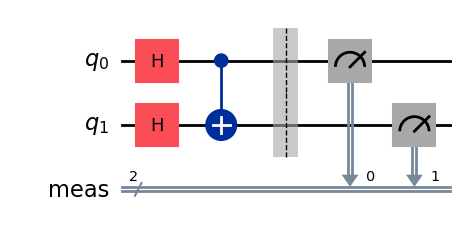

In [47]:
qc.draw("mpl")

Quantum circuits are rarely run twice, but rather for multiple shots to gauge the actual probability.

In [38]:
sampler = StatevectorSampler()

#Useless result
print("Zero Shots:")
result = sampler.run([qc], shots=1).result()
print(result[0].data.meas.get_counts())
result = sampler.run([qc], shots=1).result()
print(result[0].data.meas.get_counts())

print("\nWe get random results for each run. Because we only running it for one shot. Whereas below we get an apporximation of the expected probability. \nYou can rerun this block and observe the randomness.")

Zero Shots:
{'1': 1}
{'1': 1}

We get random results for each run. Because we only running it for one shot. Whereas below we get an apporximation of the expected probability. 
You can rerun this block and observe the randomness.


In [39]:
print("Multiple Shots:")
result = sampler.run([qc], shots=1024).result()
print(result[0].data.meas.get_counts())

Multiple Shots:
{'0': 518, '1': 506}


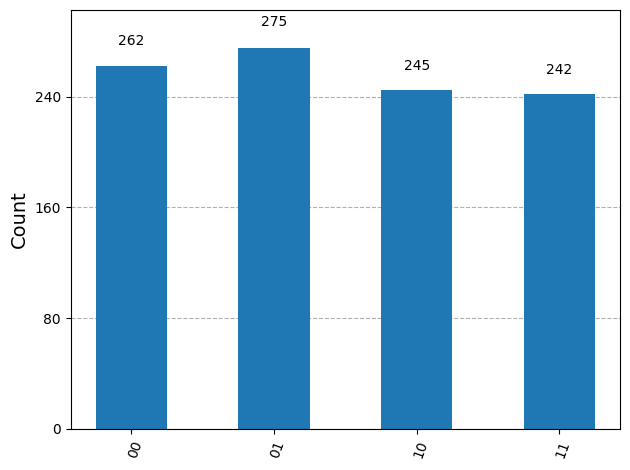

In [24]:
from qiskit.visualization import plot_histogram

counts = result[0].data.meas.get_counts()
plot_histogram(counts)


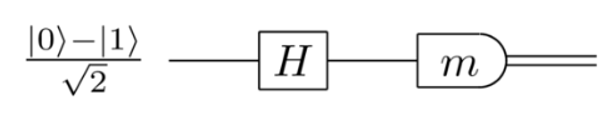

We will now construct this circuit seen in the slides and observe the output.

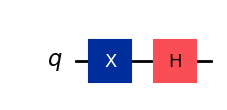

In [54]:
qc1 = QuantumCircuit(1)
qc1.x(0)
qc1.h(0)

qc1.draw("mpl")

Both circuit are equivalent as qubits start at ground state (ket 0), then a pauli-X gate is applied to make it (ket 1) which results in the expression:

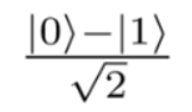


For reference:

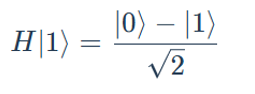

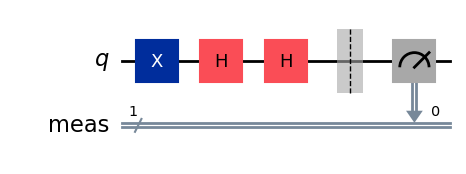

In [55]:
qc1.h(0)
qc1.measure_all()
qc1.draw("mpl")

In [56]:
sampler = StatevectorSampler()
result = sampler.run([qc1], shots=1024).result()
print(result[0].data.meas.get_counts())

{'1': 1024}
